Now, we will just use the mapping dict we made in previous step to combine the two dfs and fill up the 
remaining values with NA

In [1]:
mapping_final = {
    'age_years' : 'age',
    'age_min' : 'age',
    'age_max' : 'age',
    'age_group' : 'age_category',
    'biomarker' : '',                           # PMID doesn't seem to be the best match for this
    'dietary_restriction' : '',                 # diet column is completely empty in new_md
    'feces_phenotype_metric' : 'stool_texture', # stool_texture would have been a better matching column than disease_subtype. UMAP helps in finding that out.    
    'feces_phenotype_value' : '',   
    'sex' : 'gender',
    'control' : '',                             # here, i believe study_condition should have been a better matching column than family (we can extract the information for control cases from it)
    'target_condition' : 'study_condition',     # one can argue that disease would have been a better match to target_condition, but study_condition is also good in my opinion
    'tumor_staging_ajcc' : 'ajcc',
    'tumor_staging_tnm' : 'tnm',
    'unmetadata' : 'uncurated_metadata',
    'westernized' : 'non_westernized',          # this is one of the cases where negation is present. Hence needs to be dealt with carefully.
}

In [42]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np
import sys
import umap
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('../utils')
from functions import *
# create embedder object which we will use in the notebook
embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [4]:
# read in the two metadatas as dataframe
curated_md = pd.read_csv('../data/curated_meta.csv', low_memory=False)
new_md = pd.read_csv('../data/new_meta.csv')

### create the dataframe which will be appended to curated_md

In [25]:
# columns which were in both curated and new md, and had same name. We will add them now.
intersection_columns = ['study_name', 'sample_id', 'body_site', 'country', 'fmt_role', 'fmt_id',
       'hla', 'smoker', 'disease', 'antibiotics_current_use', 'treatment']

In [32]:
# make a copy of new_md, which will be finally appended to curated_md
new_md2 = new_md.copy()
for key in mapping_final:
    value = mapping_final[key]
    if value == '':
        new_md2[key] = pd.NA
    else:
        new_md2[key] = new_md[value]

In [33]:
# drop all the other, non required columns from new_md2
new_md2.drop(axis = 1, labels = [col for col in new_md2.columns if col not in (list(mapping_final.keys()) + intersection_columns)], inplace = True)
new_md2.head()

,study_name,sample_id,body_site,antibiotics_current_use,disease,country,treatment,smoker,fmt_id,age_years,...,dietary_restriction,feces_phenotype_metric,feces_phenotype_value,sex,control,target_condition,tumor_staging_ajcc,tumor_staging_tnm,unmetadata,westernized
0,HanniganGD_2017,MG100208,stool,no,adenoma,CAN,NaN,NaN,NaN,45.0,...,<NA>,NaN,<NA>,female,<NA>,adenoma,NaN,NaN,NaN,no
1,HanniganGD_2017,MG100207,stool,no,adenoma,CAN,NaN,NaN,NaN,50.0,...,<NA>,NaN,<NA>,male,<NA>,adenoma,NaN,NaN,NaN,no
2,HanniganGD_2017,MG100206,stool,no,adenoma,CAN,NaN,NaN,NaN,68.0,...,<NA>,NaN,<NA>,male,<NA>,adenoma,NaN,NaN,NaN,no
3,HanniganGD_2017,MG100205,stool,no,adenoma,CAN,NaN,NaN,NaN,80.0,...,<NA>,NaN,<NA>,female,<NA>,adenoma,NaN,NaN,NaN,no
4,HanniganGD_2017,MG100204,stool,no,adenoma,CAN,NaN,NaN,NaN,63.0,...,<NA>,NaN,<NA>,female,<NA>,adenoma,NaN,NaN,NaN,no


In [34]:
# since westernized was negated, we just reverse the entries
new_md2['westernized'] = new_md2['westernized'].map({'no': 'Yes', 'yes': 'No'})

### fixing the values in each column

/Users/shashankkatiyar/miniconda3/envs/gsoc/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


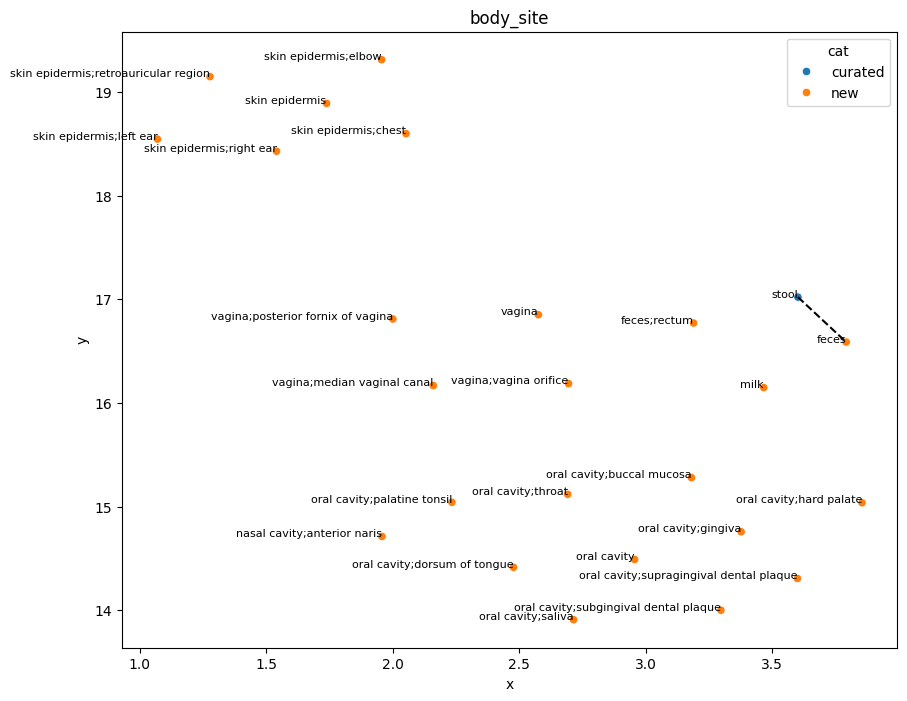

/Users/shashankkatiyar/miniconda3/envs/gsoc/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shashankkatiyar/miniconda3/envs/gsoc/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


<Figure size 640x480 with 0 Axes>

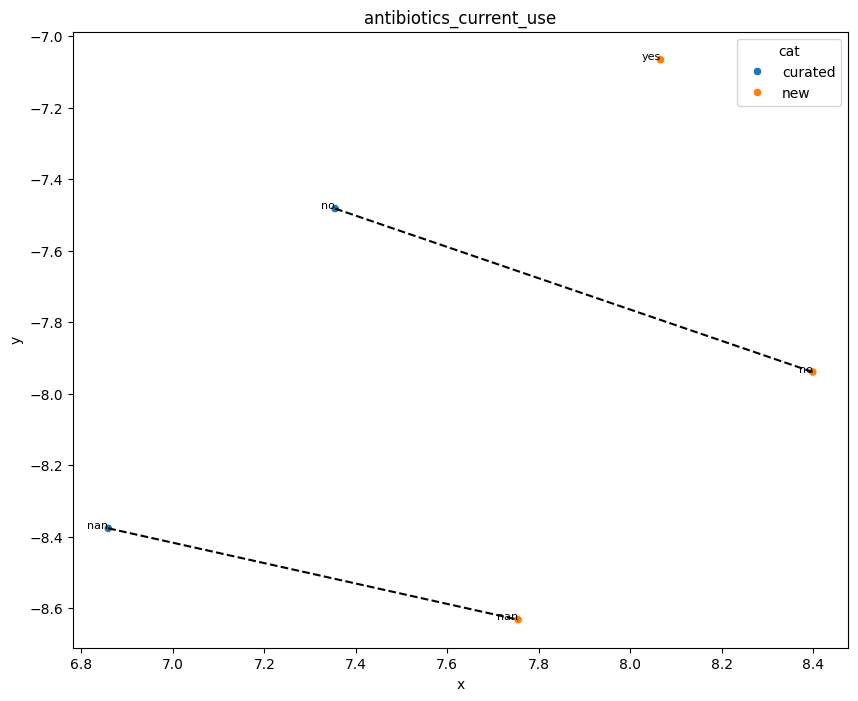

/Users/shashankkatiyar/miniconda3/envs/gsoc/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

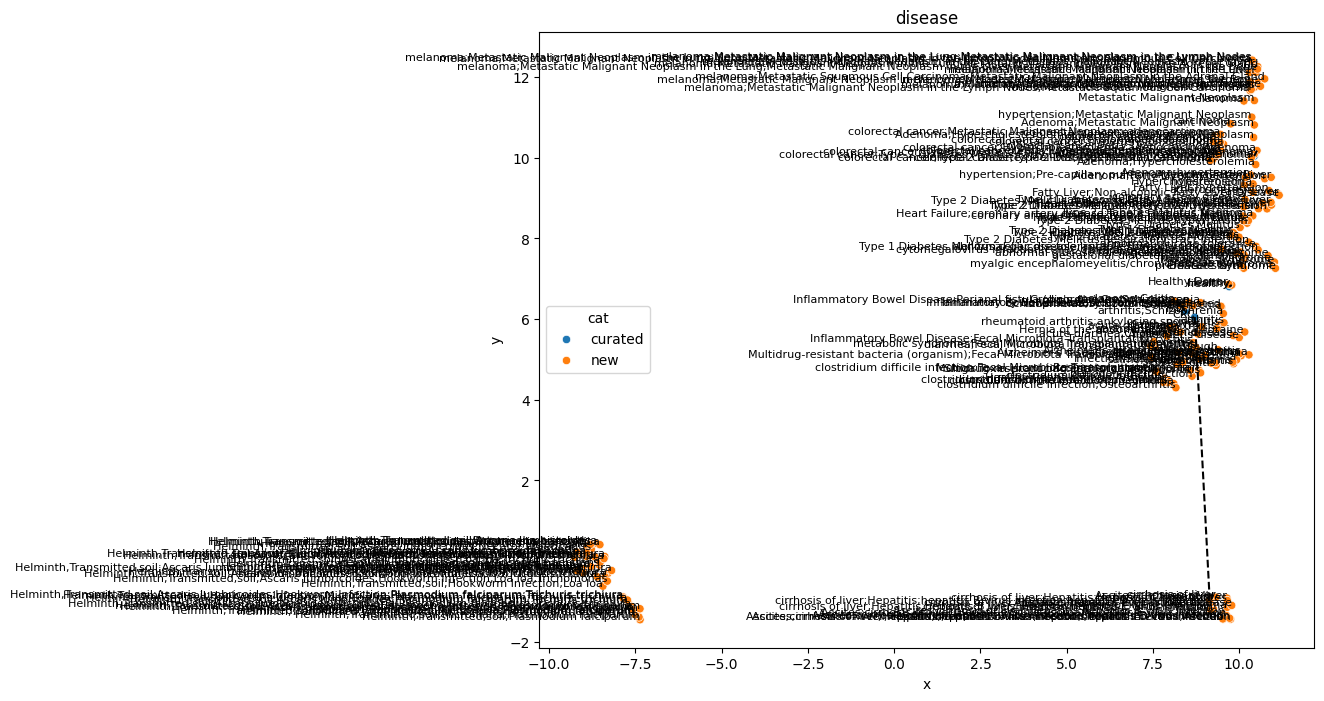

/Users/shashankkatiyar/miniconda3/envs/gsoc/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

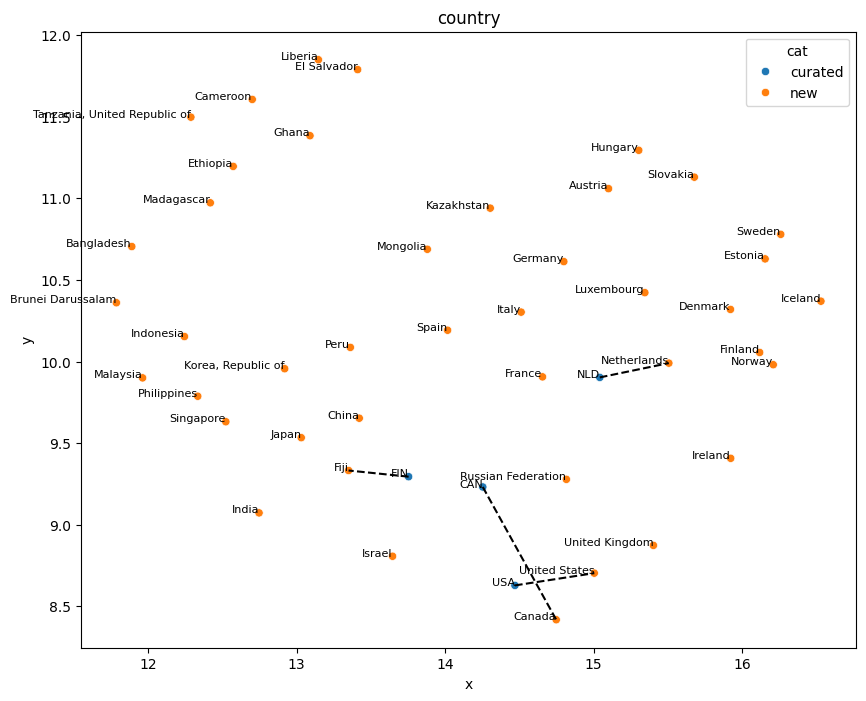

/Users/shashankkatiyar/miniconda3/envs/gsoc/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shashankkatiyar/miniconda3/envs/gsoc/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


<Figure size 640x480 with 0 Axes>

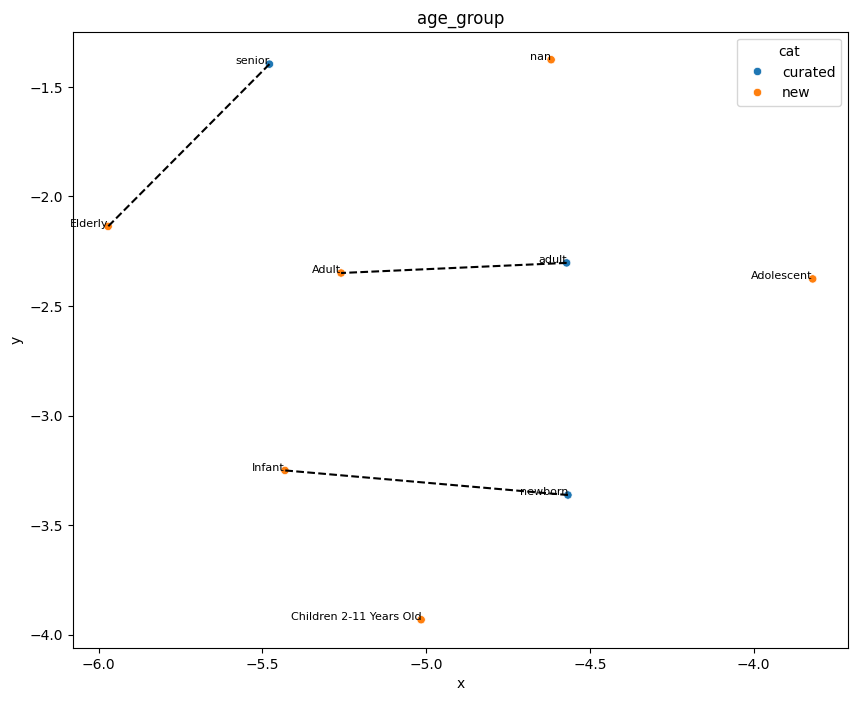

/Users/shashankkatiyar/miniconda3/envs/gsoc/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shashankkatiyar/miniconda3/envs/gsoc/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


<Figure size 640x480 with 0 Axes>

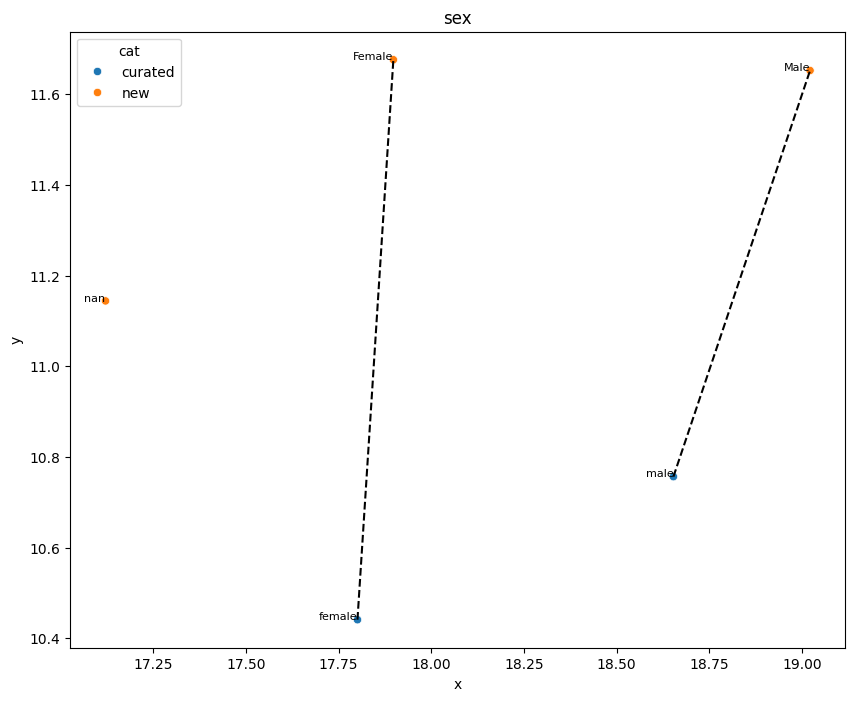

/Users/shashankkatiyar/miniconda3/envs/gsoc/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

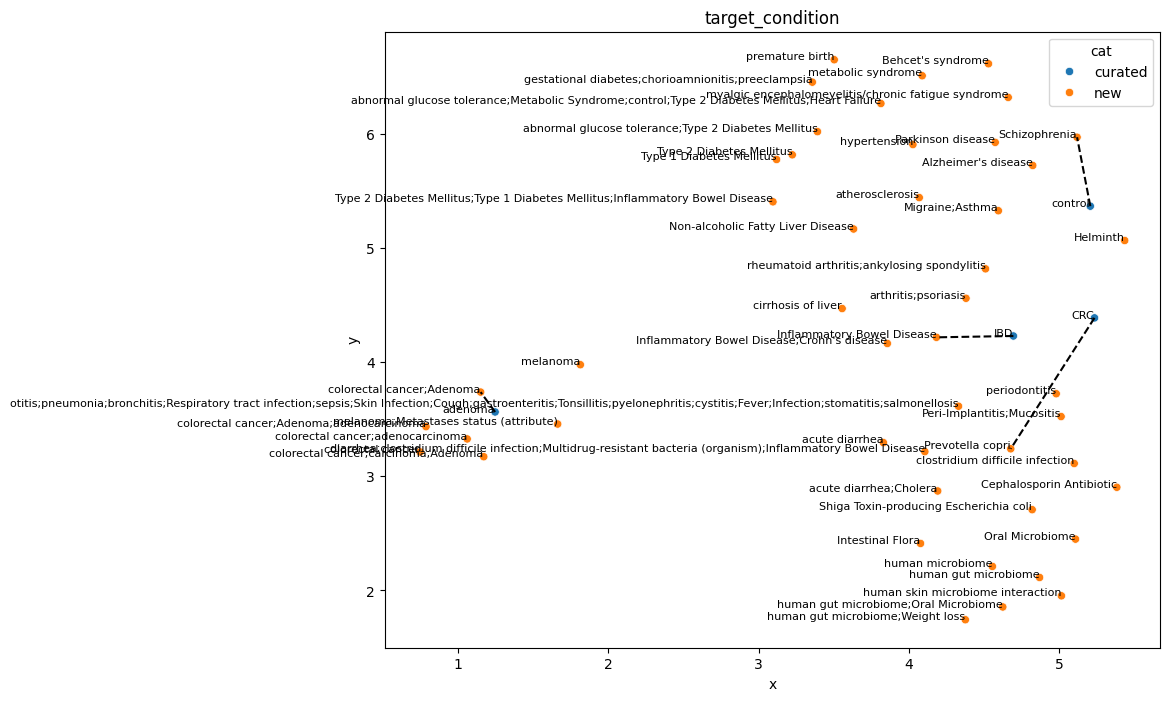

<Figure size 640x480 with 0 Axes>

In [ ]:
# get the mapping for the values for entries in each column in the two dataframes
# NOTE: demonstrating with just a few columns here. Other columns need more workb
for col in ['body_site', 'antibiotics_current_use', 'disease', 'country', 'age_group', 'sex', 'target_condition']:

    # get the distances between the unique values for current col for the two dataframes
    distances = GetDistanceBetweenSentences(new_md2[col].unique(), curated_md[col].unique(), embedder)
    # find the closest column to each of column from curated
    mapping = {}
    for itr, new_unique in enumerate(new_md2[col].unique()):
        # the key will be unique value from curated, and value will be best matching entry from new_md2
        mapping[new_unique] = curated_md[col].unique()[np.argmax(distances[itr, :])]
    # now plot the umap for the mapping as a check
    EntriesOFColUMAP(new_md2[col].unique(), curated_md[col].unique(), embedder, 10, 8, 8, title = col, mapping = mapping)

### make the corresponding changes in new_md2

In [77]:
# at this point, the user can make changes to what mapping has been automcatically found, just like was done for 
# the columns' matching

In [76]:
for col in ['body_site', 'antibiotics_current_use', 'disease', 'country', 'age_group', 'sex', 'target_condition']:
    # get the distances between the unique values for current col for the two dataframes
    distances = GetDistanceBetweenSentences(new_md2[col].unique(), curated_md[col].unique(), embedder)
    # find the closest column to each of column from curated
    mapping = {}
    for itr, new_unique in enumerate(new_md2[col].unique()):
        # the key will be unique value from curated, and value will be best matching entry from new_md2
        mapping[new_unique] = curated_md[col].unique()[np.argmax(distances[itr, :])]
    new_md2[col] = new_md2[col].map(mapping)

### merging with curated_md

In [82]:
# append on curated_md's subset, with the same subset of columns, so that we can do the final comparison too as next step
curated_md.drop(axis = 1, labels = [col for col in curated_md.columns if col not in new_md2.columns], inplace=True)
curated_md.head()

,study_name,sample_id,age_years,age_min,age_max,age_group,biomarker,body_site,country,dietary_restriction,...,smoker,control,target_condition,disease,antibiotics_current_use,treatment,tumor_staging_ajcc,tumor_staging_tnm,unmetadata,westernized
0,AsnicarF_2017,MV_FEI1_t1Q14,0.246575,0.246575,0.246575,Infant,NaN,feces,Italy,NaN,...,NaN,Study Control,human gut microbiome,Healthy,NaN,NaN,NaN,NaN,NaN,Yes
1,AsnicarF_2017,MV_FEI2_t1Q14,0.246575,0.246575,0.246575,Infant,NaN,feces,Italy,NaN,...,NaN,Study Control,human gut microbiome,Healthy,NaN,NaN,NaN,NaN,NaN,Yes
2,AsnicarF_2017,MV_FEI3_t1Q14,0.246575,0.246575,0.246575,Infant,NaN,feces,Italy,NaN,...,NaN,Study Control,human gut microbiome,Healthy,NaN,NaN,NaN,NaN,NaN,Yes
3,AsnicarF_2017,MV_FEI4_t1Q14,1.000000,1.000000,1.000000,Infant,NaN,feces,Italy,NaN,...,NaN,Study Control,human gut microbiome,Healthy,NaN,NaN,NaN,NaN,NaN,Yes
4,AsnicarF_2017,MV_FEI4_t2Q15,1.000000,1.000000,1.000000,Infant,NaN,feces,Italy,NaN,...,NaN,Study Control,human gut microbiome,Healthy,NaN,NaN,NaN,NaN,NaN,Yes


In [84]:
# finally append the two dfs and save as a file
concatenated_md = pd.concat([curated_md, new_md2])
concatenated_md.to_csv('../data/concatenated_meta.csv', index=False)